In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/bigmart_train.csv")

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
data.shape

(8523, 12)

# Univariate analysis

In [ ]:
plt.figure(figsize = (20,15))


# Numerical variables

In [4]:
numeric_features = data.select_dtypes(include = (np.number))
numeric_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [5]:
numeric_features.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
numeric_features.dtype

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

# Corelation between numeric features and target

In [8]:
numeric_corr = numeric_features.corr()
numeric_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [9]:
numeric_corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

# Corelation Matrix

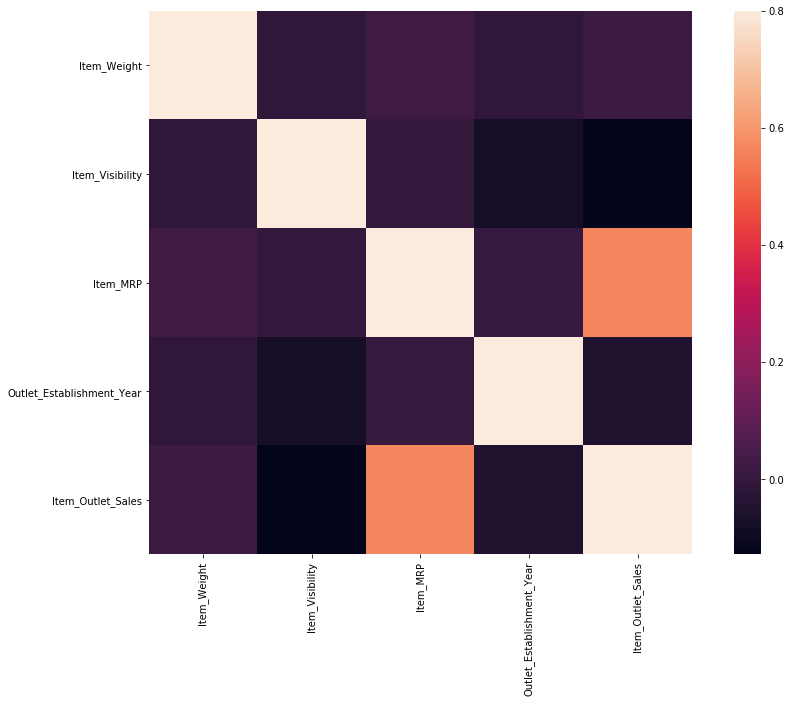

In [10]:
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(numeric_corr, vmax=.8, square=True)

In [11]:
cat_features = data.select_dtypes( include = (np.object))
cat_features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [12]:
cat_features.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
for col in cat_features:
    print(col+": "+cat_features[col].unique())

['Item_Identifier: FDA15' 'Item_Identifier: DRC01'
 'Item_Identifier: FDN15' ... 'Item_Identifier: NCF55'
 'Item_Identifier: NCW30' 'Item_Identifier: NCW05']
['Item_Fat_Content: Low Fat' 'Item_Fat_Content: Regular'
 'Item_Fat_Content: low fat' 'Item_Fat_Content: LF'
 'Item_Fat_Content: reg']
['Item_Type: Dairy' 'Item_Type: Soft Drinks' 'Item_Type: Meat'
 'Item_Type: Fruits and Vegetables' 'Item_Type: Household'
 'Item_Type: Baking Goods' 'Item_Type: Snack Foods'
 'Item_Type: Frozen Foods' 'Item_Type: Breakfast'
 'Item_Type: Health and Hygiene' 'Item_Type: Hard Drinks'
 'Item_Type: Canned' 'Item_Type: Breads' 'Item_Type: Starchy Foods'
 'Item_Type: Others' 'Item_Type: Seafood']
['Outlet_Identifier: OUT049' 'Outlet_Identifier: OUT018'
 'Outlet_Identifier: OUT010' 'Outlet_Identifier: OUT013'
 'Outlet_Identifier: OUT027' 'Outlet_Identifier: OUT045'
 'Outlet_Identifier: OUT017' 'Outlet_Identifier: OUT046'
 'Outlet_Identifier: OUT035' 'Outlet_Identifier: OUT019']


TypeError: can only concatenate str (not "float") to str

In [21]:
cat_features.apply(lambda x : len(x.unique()))

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [31]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [33]:
item_avg_weight = data.groupby('Item_Identifier').Item_Weight.mean()
item_avg_weight

4

In [28]:
miss_bool = data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [29]:
data.loc[miss_bool, 'Item_Identifier']

7       FDP10
18      DRI11
21      FDW12
23      FDC37
29      FDC14
        ...  
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 1463, dtype: object

In [30]:
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])

In [7]:
from scipy.stats import mode

In [8]:
outlet_size_mode = data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
outlet_size_mode

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [73]:
mode_size = data.groupby('Outlet_Type').Outlet_Size.apply(lambda x:mode(x).mode[0])
mode_size

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [9]:
miss_bool = data['Outlet_Size'].isnull() 

In [10]:
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode.loc[x])